<a href="https://colab.research.google.com/github/EduardoJM/data-science-quarentenadados/blob/master/QuarentenaDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1: Python, Pandas e Colab

## Lendo os dados do MovieLens

In [0]:
# importa a biblioteca 'pandas' com o nome 'pd'
import pandas as pd

In [0]:
# lê o arquivo (dataset de filmes) csv do github
filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv')
# filmes é um DataFrame
print(filmes.columns)
# altera o nome das colunas
filmes.columns = ['filmeID', 'titulo', 'genero']
# mostra os 5 primeiros registros do DataFrame
filmes.head()

Index(['movieId', 'title', 'genres'], dtype='object')


,filmeID,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


para exibir documentação interna ao Colab (aparentemente, também funciona no Jupyter), usar uma interrogação, por exemplo:

```python
?filmes.head
```

In [0]:
# lê o dataset das avaliações do github
avaliacoes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv')
# exibe os 5 primeiros registros
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
# exibe o formato do DataFrame (linhas, colunas)
avaliacoes.shape

(100836, 4)

In [0]:
# exibe o tamanho do DataFrame (linhas)
len(avaliacoes)

100836

In [0]:
# exibe as colunas do DataFrame
avaliacoes.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [0]:
# altera os textos das colunas do DataFrame
avaliacoes.columns = ['usuarioID', 'filmeID', 'nota', 'momento']

In [0]:
# exibe a tabela 'avaliacoes'
avaliacoes

,usuarioID,filmeID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


## Primeiras noções de dados estatísticos

In [0]:
# exibe descrições do DataFrame
avaliacoes.describe()

,usuarioID,filmeID,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [0]:
# pega um Series da coluna 'nota' e exibe
avaliacoes['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [0]:
# filtra os filmes pela query, pega filmes com o ID==1
avaliacoes_filme_1 = avaliacoes.query('filmeID==1')

In [0]:
# exibe as medias das propriedades do filme de ID==1
avaliacoes_filme_1.mean()

usuarioID    3.065302e+02
filmeID      1.000000e+00
nota         3.920930e+00
momento      1.129835e+09
dtype: float64

In [0]:
# exibe a media da propriedade nota do filme de ID==1
avaliacoes_filme_1['nota'].mean()

3.9209302325581397

In [0]:
# agrupa as avaliacoes por filmeID, pega a coluna 'nota' e calcula as medias (por filmeID)
notas_medias_por_filmes = avaliacoes.groupby('filmeID')['nota'].mean()
# exibe os 5 primeiros registros
notas_medias_por_filmes.head()

filmeID
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [0]:
# junta a tabela de filmes com a Series de avaliacoes medias por filmes
filmes_com_media = filmes.join(notas_medias_por_filmes, on="filmeID")

In [0]:
filmes_com_media.head()

,filmeID,titulo,genero,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


## Desafio 1

mudar o nome da coluna nota para média após o join

In [0]:
filmes_com_media.columns = ['filmeID', 'titulo', 'genero', 'media']
filmes_organizados = filmes_com_media.sort_values("media", ascending=False)

## Desafio 2

Encontre os 18 filmes que não tem avaliações.

In [150]:
filmes_sem_nota = filmes_organizados.query("media != media")
filmes_sem_nota

,filmeID,titulo,genero,media
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


## Desafio 3

Colocar o número de avaliações por filme, isto é, não só a média mas o total de votos por filmes

In [0]:
quantidade_avaliacoes = avaliacoes.set_index(["filmeID", "momento", "nota"]).count(level="filmeID")["usuarioID"]
quantidade_avaliacoes.name='avaliacoes'

In [159]:
filmes_com_qtd_avaliacoes = filmes_organizados.join(quantidade_avaliacoes, on="filmeID").fillna(0).astype({'avaliacoes': 'int64'})
filmes_com_qtd_avaliacoes

,filmeID,titulo,genero,media,avaliacoes
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0,1
8107,100556,"Act of Killing, The (2012)",Documentary,5.0,1
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0,1
9094,143511,Human (2015),Documentary,5.0,1
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0,1
...,...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,0.0,0
5824,32160,Twentieth Century (1934),Comedy,0.0,0
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,0.0,0
5957,34482,"Browning Version, The (1951)",Drama,0.0,0


## Desafio 4

Arredondar os valores para 2 casas decimais (notas médias)

In [160]:
filmes_com_qtd_avaliacoes.round({"media": 2})

,filmeID,titulo,genero,media,avaliacoes
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0,1
8107,100556,"Act of Killing, The (2012)",Documentary,5.0,1
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0,1
9094,143511,Human (2015),Documentary,5.0,1
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0,1
...,...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,0.0,0
5824,32160,Twentieth Century (1934),Comedy,0.0,0
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,0.0,0
5957,34482,"Browning Version, The (1951)",Drama,0.0,0


## Desafios 5, 6 e 7

Como os desafios são 'interligados', agora, reordenando o *notebook*, vou adicionar todos em um bloco só com as resoluções também mescladas.

5 - Descobrir quais são os generos (únicos, quais são eles)

6 - Contar quantos filmes tem em cada genero

7 - Plotar o gráfico de aparições por genero. Pode ser um gráfico de barras

### Minha Resolução

Resolução feita por mim, consultando a documentação do pandas, após o termino da primeira aula (por um caminho mais longo hahaha).

In [0]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


                genero  quantidade
6                Drama        4361
3               Comedy        3756
9             Thriller        1894
7               Action        1828
5              Romance        1596
0            Adventure        1263
8                Crime        1199
12              Sci-Fi         980
10              Horror         978
4              Fantasy         779
2             Children         664
1            Animation         611
11             Mystery         573
15         Documentary         440
13                 War         382
14             Musical         334
17             Western         167
16                IMAX         158
18           Film-Noir          87
19  (no genres listed)          34


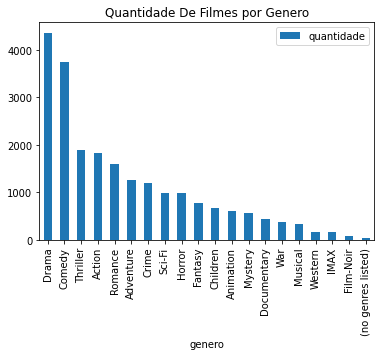

In [179]:
# Minha Resolução
# transforma cada lista de generos separados por '|' em um array com os generos
splited = filmes["genero"].transform(lambda x: x.split('|'))
# separa os items do array criado pelo comando de cima
exploded = splited.explode()
# deleta as duplicatas
clean = exploded.drop_duplicates()
# reseta os índices
generos_unicos = clean.reset_index(drop=True)
# comando de teste para filtrar os filmes com um determinado genero
# filmes.query('genero.str.contains("(no genres listed)")', engine='python')
# cria outra serie com a mesma quantidade de items da de cima
quantidade_base = pd.Series(range(0, len(generos_unicos)))
# usa o transform pra pegar a quantidade de vezes que o genero apareceu nos filmes
filled = quantidade_base.transform(lambda x: len(filmes.query('genero.str.contains(@reindexed[@x])', engine='python')))
# junta num dataframe genero\quantidade e reordena
quantidade_por_genero = pd.DataFrame(data={'genero': generos_unicos, 'quantidade': filled}).sort_values(by='quantidade', ascending=False)
print(quantidade_por_genero)
# plota os dados
quantidade_por_genero.plot(kind="bar", title="Quantidade De Filmes por Genero", x="genero")
plt.show()

### Resolução apresentada pelos professores

Resolução apresentada pelos professores do #QuarentenaDados na segunda aula.

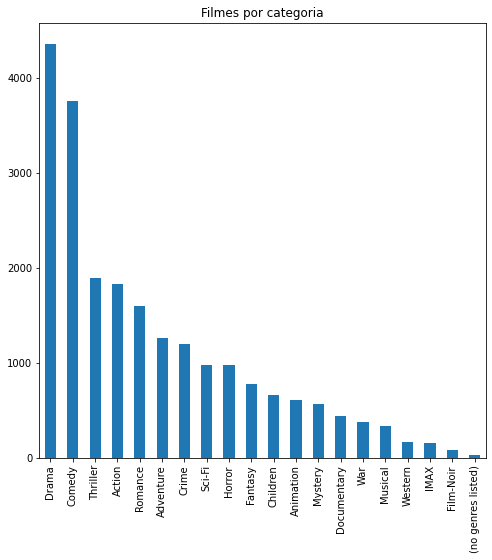

In [177]:
serie_profs = filmes["genero"].str.get_dummies('|').sum().sort_values(ascending=False)
serie_profs.plot(kind='bar', title="Filmes por categoria", figsize=(8, 8))
plt.show()

#### Gráfico de pizza


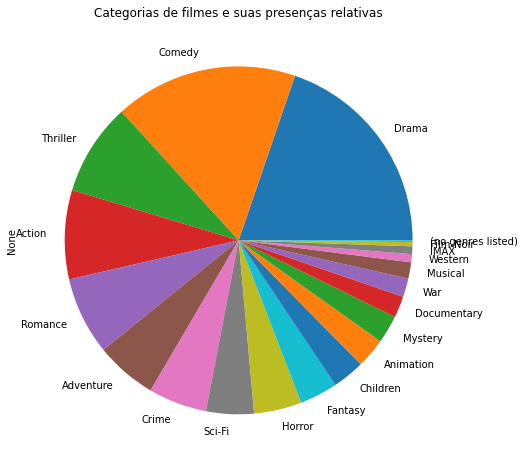

In [171]:
serie_profs.plot(kind='pie', title="Categorias de filmes e suas presenças relativas", figsize=(8, 8))

# Aula 2: Médias, medianas e visualização de dados

## Usando o seaborn para plotar

In [172]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


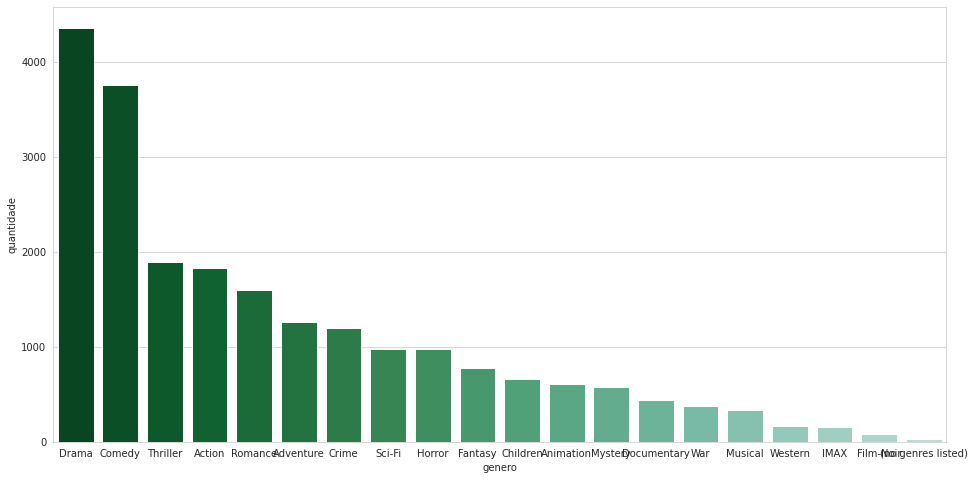

In [193]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))
sns.barplot(x=quantidade_por_genero['genero'],
            y=quantidade_por_genero['quantidade'],
            palette=sns.color_palette('BuGn_r', n_colors=len(serie_profs) + 8))
plt.show()

3.9209302325581397


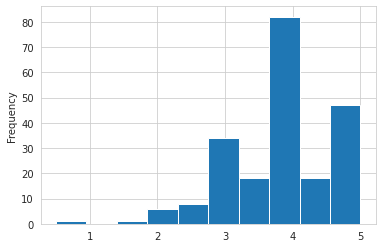

In [203]:
notas_filme_1 = avaliacoes.query('filmeID==1')['nota']
print(notas_filme_1.mean())
notas_filme_1.plot(kind='hist')

3.4318181818181817


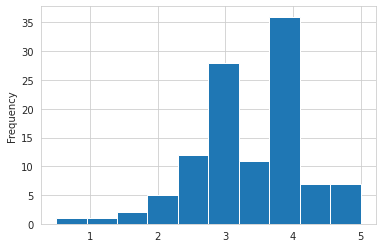

In [202]:
notas_filme_2 = avaliacoes.query('filmeID==2')['nota']
print(notas_filme_2.mean())
notas_filme_2.plot(kind='hist')

## Medidas de tendência central

Exemplo de duas populações pra mostrar que a media nem sempre é a melhor medida de tendência central
```python
populacao1 = 1000
salario = 1100 # 1000 pessoas com salário de 1000 reais
media = 1100
```

```python
populacao = 1000
salario1 = 1000000 # uma pessoa recebe 1 milhão
salario999 = 100 # 999 pessoas recebem 100
media = (salario1 * 1 + salario999 * 999) = 1100
```

In [207]:
(100 * 999 + 1000000) / 1000

1099.9

mediana (`50%`) divide o grupo onde a metade fica de um lado e a metade fica de outro lado (explicação grotesca hahaha!)

In [209]:
notas_filme_1.describe()

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: nota, dtype: float64

In [208]:
notas_filme_2.describe()

count    110.000000
mean       3.431818
std        0.881713
min        0.500000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: nota, dtype: float64

In [216]:
filmes_com_qtd_avaliacoes[2450:2500]

,filmeID,titulo,genero,media,avaliacoes
745,973,Meet John Doe (1941),Comedy|Drama,3.900000,5
6632,56251,Futurama: Bender's Big Score (2007),Animation|Comedy|Sci-Fi,3.900000,10
101,116,Anne Frank Remembered (1995),Documentary,3.900000,5
5719,27846,"Corporation, The (2003)",Documentary,3.900000,10
802,1050,Looking for Richard (1996),Documentary|Drama,3.900000,5
3983,5617,Secretary (2002),Comedy|Drama|Romance,3.900000,25
1323,1785,King of New York (1990),Crime|Thriller,3.900000,5
7103,70599,"Time Traveler's Wife, The (2009)",Drama|Romance|Sci-Fi,3.900000,5
5248,8607,Tokyo Godfathers (2003),Adventure|Animation|Drama,3.900000,5
4677,6985,"Passion of Joan of Arc, The (Passion de Jeanne...",Drama,3.900000,5


In [0]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f'filmeID=={n}')['nota']
  notas_do_filme.plot(kind='hist')
  return notas_do_filme.describe()

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

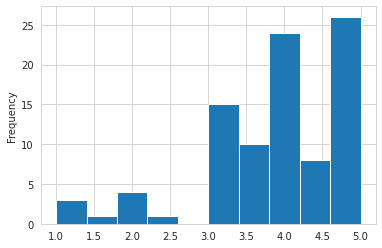

In [228]:
plot_filme(919)

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

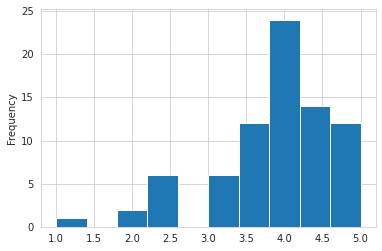

In [226]:
plot_filme(46578)

## Boxplot

In [0]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f'filmeID=={n}')['nota']
  notas_do_filme.plot(kind='hist')
  plt.show()
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()

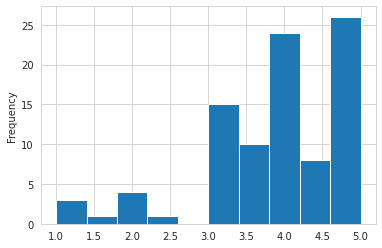

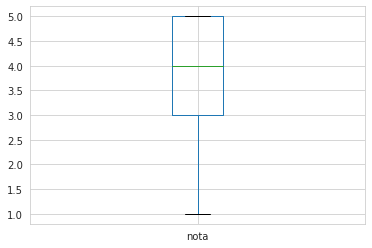

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [232]:
plot_filme(919)

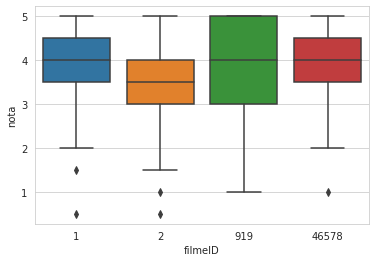

In [241]:
sns.boxplot(data = avaliacoes.query('filmeID in [1, 2, 919, 46578]'), x='filmeID', y='nota')

## Desafio 1

Rotacionar os thicks (nomes dos generos)

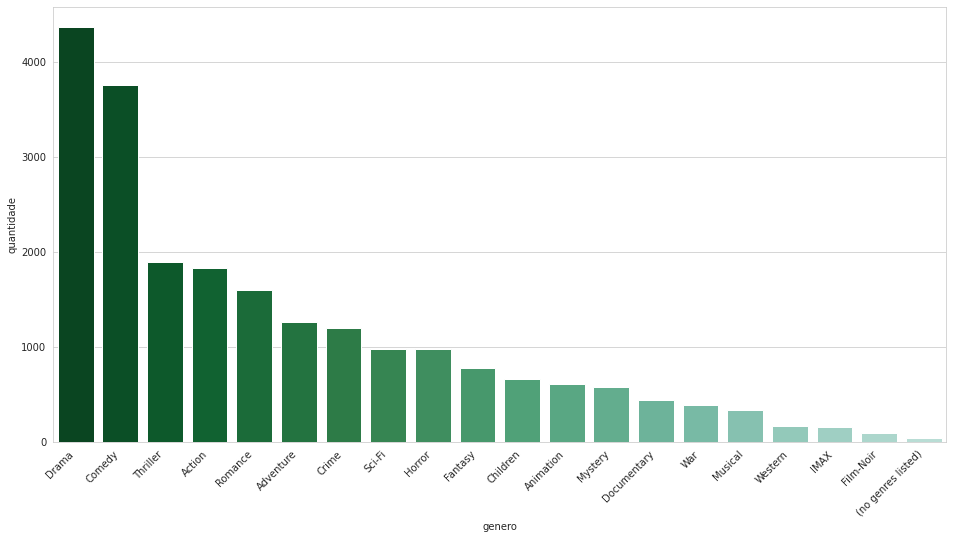

In [206]:
plt.figure(figsize=(16, 8))
graph = sns.barplot(x=quantidade_por_genero['genero'],
                    y=quantidade_por_genero['quantidade'],
                    palette=sns.color_palette('BuGn_r', n_colors=len(serie_profs) + 8))
graph.set_xticklabels(graph.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

## Desafio 2

Comparar outros filmes com notas próximas e achar distribuições bem diferentes (visualmente diferentes)

## Desafio 3 e 4

Criar o boxplot dos 10 filmes com maior número de avaliações (mais votos) 

O boxplot estar num tamanho adequado e com os NOMES dos filmes nos ticks

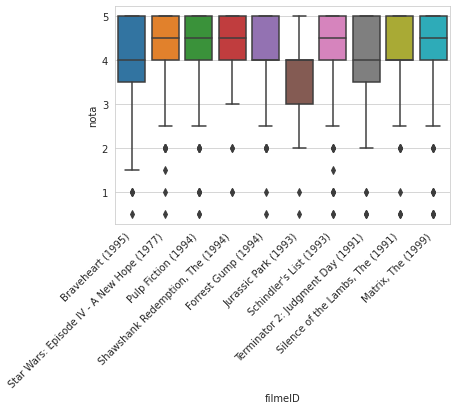

In [316]:
# filtra os filmes com o maior numero de avaliações e pega o range[0:10]
top10 = filmes_com_qtd_avaliacoes.sort_values(by='avaliacoes', ascending=False)[0: 10]
# pega a coluna filmeID
top10ids = top10["filmeID"]
# junta em um 'fake-array' string para fazer a busca
ids = ', '.join(str(x) for x in top10ids.values)
# seleciona as avaliações
top10avaliacoes = avaliacoes.query(f'filmeID in [{ids}]')

# pegar o nome do filme pelo id
def getNameById(id):
  data = filmes.query(f'filmeID=={id}')
  return data['titulo'].values[0]

# plotar
boxgraph = sns.boxplot(data=data, x='filmeID', y='nota')
# alterar o nome do x-ticks
labels = boxgraph.get_xticklabels()
for i in range(0, len(labels)):
  l = labels[i];
  labels[i] = getNameById(l.get_text())
boxgraph.set_xticklabels(labels, rotation=45, horizontalalignment='right')
# exibir
plt.show()

## Desafio 5

Calcular média, moda, mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

## Desafio 6

Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas)

## Desafio 7

Gráfico de notas médias por ano

In [0]:
# divide os titulos dos filmes pelo caractere '(', pega o último item do array e substitui ')' por ''
years = filmes_com_qtd_avaliacoes['titulo'].str.split(pat = "(").transform(lambda x: x[len(x) - 1]).str.replace(')', '')
# verifica se x é um digito, se for, retorna int(x.strip()), senão, retorna 0
# usado para filmes que não estão no formato desejado "Nome (ANO)"
def fillNoYear(x):
  if x.strip().isdigit():
    return int(x.strip())
  else:
    return 0
# aplica a função acima a todos os anos encontrados
years = years.transform(lambda x: fillNoYear(x))

In [0]:
# seta o nome do indice da coluna
years.name='ano'
# mescla com o DataFrame filmes_com_qtd_avaliacoes
filmes_com_ano = filmes_com_qtd_avaliacoes.join(years)

In [389]:
# agrupa pelo 'ano'
agrupado_por_ano = filmes_com_ano.sort_values(by='ano', ascending=False).groupby(['ano'])
# calcula a media
media_por_ano = agrupado_por_ano['media'].mean()
# exibe
media_por_ano

ano
0       3.711538
1902    3.500000
1903    2.500000
1908    4.000000
1915    2.000000
          ...   
2014    3.113464
2015    3.069094
2016    3.103748
2017    3.376749
2018    3.372561
Name: media, Length: 107, dtype: float64

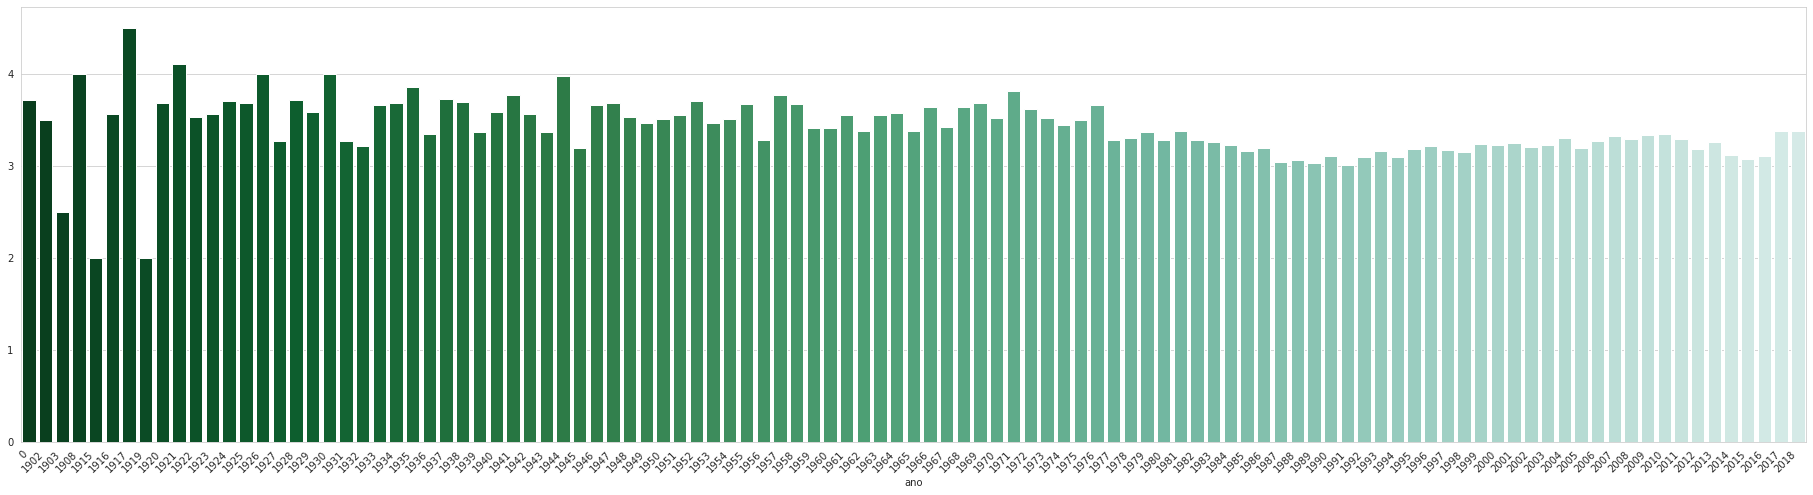

In [392]:
# plota o gráfico
plt.figure(figsize=(32, 8))
graph = sns.barplot(x=media_por_ano.index,
                    y=media_por_ano.values,
                    palette=sns.color_palette('BuGn_r', n_colors=len(media_por_ano) + 30))
# gira os xtick
graph.set_xticklabels(graph.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()